In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# 1. Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # For simplicity, we take only the first two features for visualization

In [3]:
# 2. Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 3. Find the optimal number of clusters using the Elbow method
inertia_list = []
for i in range(1, 11):  # we'll check for up to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

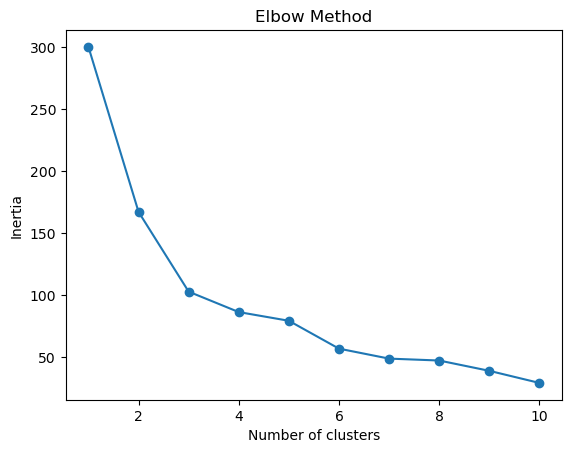

In [5]:
plt.figure()
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [6]:
# Based on the plot, choose an optimal value for k (number of clusters)
k = 3  # This can be changed based on the plot

In [7]:
# 4. Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


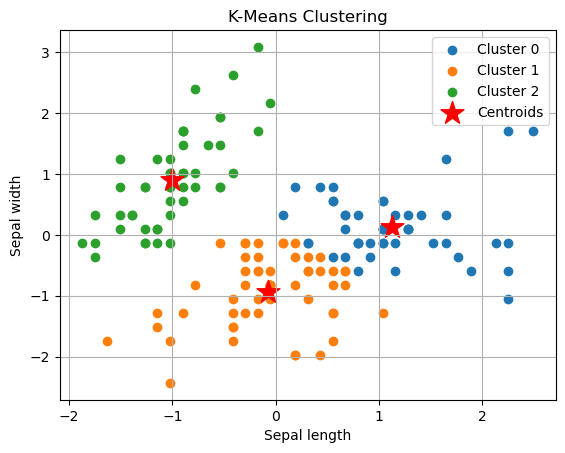

In [8]:
# 5. Visualize the clusters
plt.figure()
for i in range(k):
    plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 6. Evaluate the clustering
# https://en.wikipedia.org/wiki/Silhouette_(clustering)
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.44


In [10]:
# 7. Example function to obtain the prediction for a new observation

def plot_new_observation(new_obs):
    # Standardize the new observation
    new_obs_scaled = scaler.transform([new_obs])

    # Predict its cluster
    cluster = kmeans.predict(new_obs_scaled)[0]
    print(f"New observation is predicted to be in cluster #{cluster}")

    plt.figure(figsize=(8,6))

    # Plot existing clusters
    for i in range(k):
        plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], label=f'Cluster {i}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')

    # Plot the new observation
    plt.scatter(new_obs_scaled[0, 0], new_obs_scaled[0, 1], c='black', marker='x', s=100, label='New Observation')

    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.title(f'New Observation in Cluster {cluster}')
    plt.legend()
    plt.grid(True)
    plt.show()

New observation is predicted to be in cluster #2


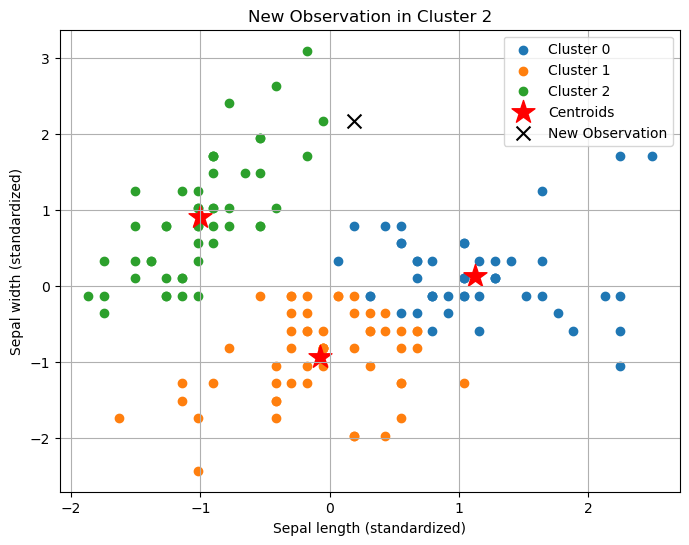

In [11]:
# Test the function
new_observation = [6, 4]  # Example new observation
plot_new_observation(new_observation)